# Integrate-and-Fire (single neuron)

Install required packages:

In [1]:
import numpy as np
import pylab as pl

Initialize parameters:

In [41]:
# timesteps
dt = 0.01 
iterations = 200
x = np.arange(0, iterations) * dt

# mebrane resistance
R = 1 

# membrane time constant
tau_m = 0.04

# external input (mA)
I = 20

# starting potential (mV)
V0 = 0 

# resting potential (mV)
V_rest = -70

# reset
reset = -80

# threshold
T = -63

# constants
gamma = 0.65

# array containing voltages 
voltages = np.zeros(iterations)

# array containing spike times
spikes = np.ones(iterations) * -100

# array containing current
I_t = np.ones(iterations) * I

# array containing current estimate
Ihat_t = np.zeros(iterations)

# o(t)
o_t = np.zeros(iterations)

Run simulation:

Euler method for current estimate $\hat{I}$:
<br>
$\hat{I}(t_{n}) = \hat{I}(t_{n - 1}) + \Delta t \frac{d\hat{I}}{dt} (t_{n -1})$
<br>
$\frac{d\hat{I}}{dt}(t_{n -1}) = - \hat{I}(t_{n - 1}) + \Gamma o(t_{n - 1})$

In [42]:
for i in range(1, iterations):

    # update current estimate
    dIdt = - Ihat_t[i - 1] + gamma * o_t[i - 1]
    Ihat_t[i] = Ihat_t[i - 1] + dt * dIdt
    
    # update voltage
    dVdt = (-(voltages[i - 1] - V_rest) + R * I) / tau_m
    voltages[i] = voltages[i - 1] + dt * dVdt
    
    # reset voltage when reaching threshold
    if voltages[i] > T:
        
        # update voltage 
        voltages[i] = reset
        spikes[i] = -90
        
        # update o(t)
        o_t[i] = 1 / dt


Plot results:

Text(0,0.5,'V (in mV)')

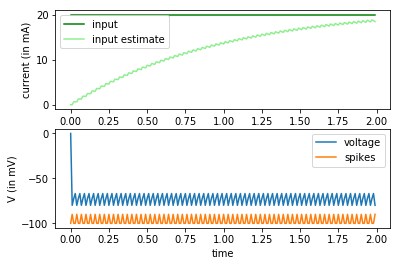

In [43]:
# plot input and input estimate
pl.subplot(2, 1, 1)
pl.plot(x, I_t, color='green',label='input')
pl.plot(x, Ihat_t, color='lightgreen',label='input estimate')
pl.legend()
pl.ylabel('current (in mA)')

# plot voltage and spike times
pl.subplot(2, 1, 2)
pl.plot(x, voltages,label='voltage')
pl.plot(x, spikes,label='spikes')
pl.legend()
pl.xlabel('time')
pl.ylabel('V (in mV)')